<h1>Sales Analysis<h1>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)


In [3]:
#Importing and Renaming
df = pd.read_csv("cleaned-sales.csv")
df.rename(columns={'Launch-Date':'Latest-Launch'},inplace=True)
df.head()

,Model,Sales,Price,Latest-Launch,Days,Months,Years
0,Acura - Integra,16.919,21.50,2014-02-02,1359,45,3
1,Acura - TL,39.384,28.40,2015-03-06,962,32,2
2,Acura - RL,8.588,42.00,2015-10-03,751,25,2
3,Audi - A4,20.397,23.99,2015-08-10,805,26,2
4,Audi - A6,18.780,33.95,2015-09-08,776,25,2


In [4]:
df.describe()

,Sales,Price,Days,Months,Years
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,53.245832,27.390755,1064.490323,34.993548,2.425806
std,68.397550,14.351653,367.358867,12.266254,1.056510
min,0.110000,9.235000,671.000000,22.000000,1.000000
25%,14.074500,18.017500,838.500000,27.000000,2.000000
50%,29.450000,22.799000,1023.000000,34.000000,2.000000
75%,68.183500,31.947500,1239.000000,41.000000,3.000000
max,540.561000,85.500000,3540.000000,118.000000,9.000000


In [5]:
# Min and Max Function
def Get_min_max(column):
    Max = df[column].idxmax()
    Max_df = pd.DataFrame(df.loc[Max])
    
    Min = df[column].idxmin()
    Min_df = pd.DataFrame(df.loc[Min])
    
    min_max_df = pd.concat([Min_df, Max_df], axis=1)
    min_max_df.columns= ['Minimun','Maximum']
    return min_max_df

In [6]:
# Min and Max sales
Get_min_max('Sales')
# Both cars were launched in the same year and nearly equal price
#but the differnce in sales is very huge

,Minimun,Maximum
Model,Mitsubishi - 3000GT,Ford - F-Series
Sales,0.11,540.561
Price,25.45,26.935
Latest-Launch,2014-06-29,2014-08-16
Days,1212,1164
Months,40,38
Years,3,3


In [7]:
# Min and max price
Get_min_max('Price')
# The amount of sales can't be compared due to the difference in the date of launch

,Minimun,Maximum
Model,Chevrolet - Metro,Mercedes-Benz- CL500
Sales,21.855,0.954
Price,9.235,85.5
Latest-Launch,2014-04-13,2015-11-04
Days,1289,719
Months,42,23
Years,3,1


In [8]:
# Min Max for the period of sales recorded
Get_min_max('Days')
# chevrolet in a small period of time has more sales than mercury in 9 years

,Minimun,Maximum
Model,Chevrolet - Monte Carlo,Mercury - Mountaineer
Sales,42.593,27.609
Price,19.39,27.56
Latest-Launch,2015-12-22,2008-02-13
Days,671,3540
Months,22,118
Years,1,9


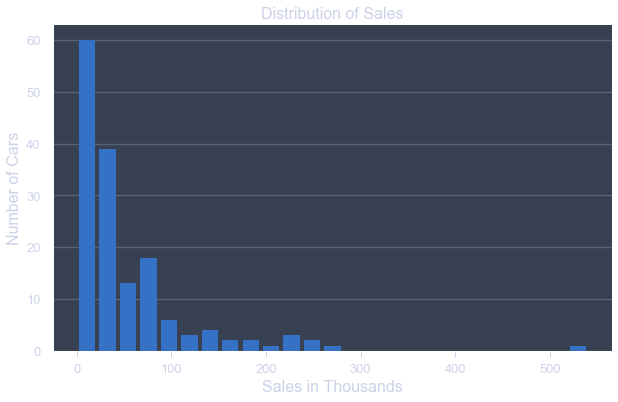

In [9]:
# histogram plot
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
ax.set_axisbelow(True)
plt.hist(df['Sales'], bins=25, rwidth=0.8)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(left=False)
ax.set_xlabel('Sales in Thousands', fontsize=16)
ax.set_ylabel('Number of Cars', fontsize=16)
ax.set_title('Distribution of Sales', fontsize=16)
plt.grid(axis='y')
plt.show()

# Most of the cars sales are under 100000 sales 

In [10]:
# To avoid biased data --> drop sales above 300
df = df[df['Sales'] <= 300 ]

In [11]:
# How many models from each manufacturer 
split_df = df['Model'].str.split('-',n=1,expand=True)
dist_df = split_df.groupby(0).size()
dist_df

0
Acura             3
Audi              3
BMW               3
Buick             4
Cadillac          5
Chevrolet         9
Chrysler          6
Dodge            11
Ford             10
Honda             5
Hyundai           3
Infiniti          1
Jaguar            1
Jeep              3
Lexus             6
Lincoln           3
Mercedes          9
Mercury           6
Mitsubishi        7
Nissan            7
Oldsmobile        6
Plymouth          4
Pontiac           6
Porsche           3
Saab              2
Saturn            5
Subaru            2
Toyota            9
Volkswagen        6
Volvo             6
dtype: int64

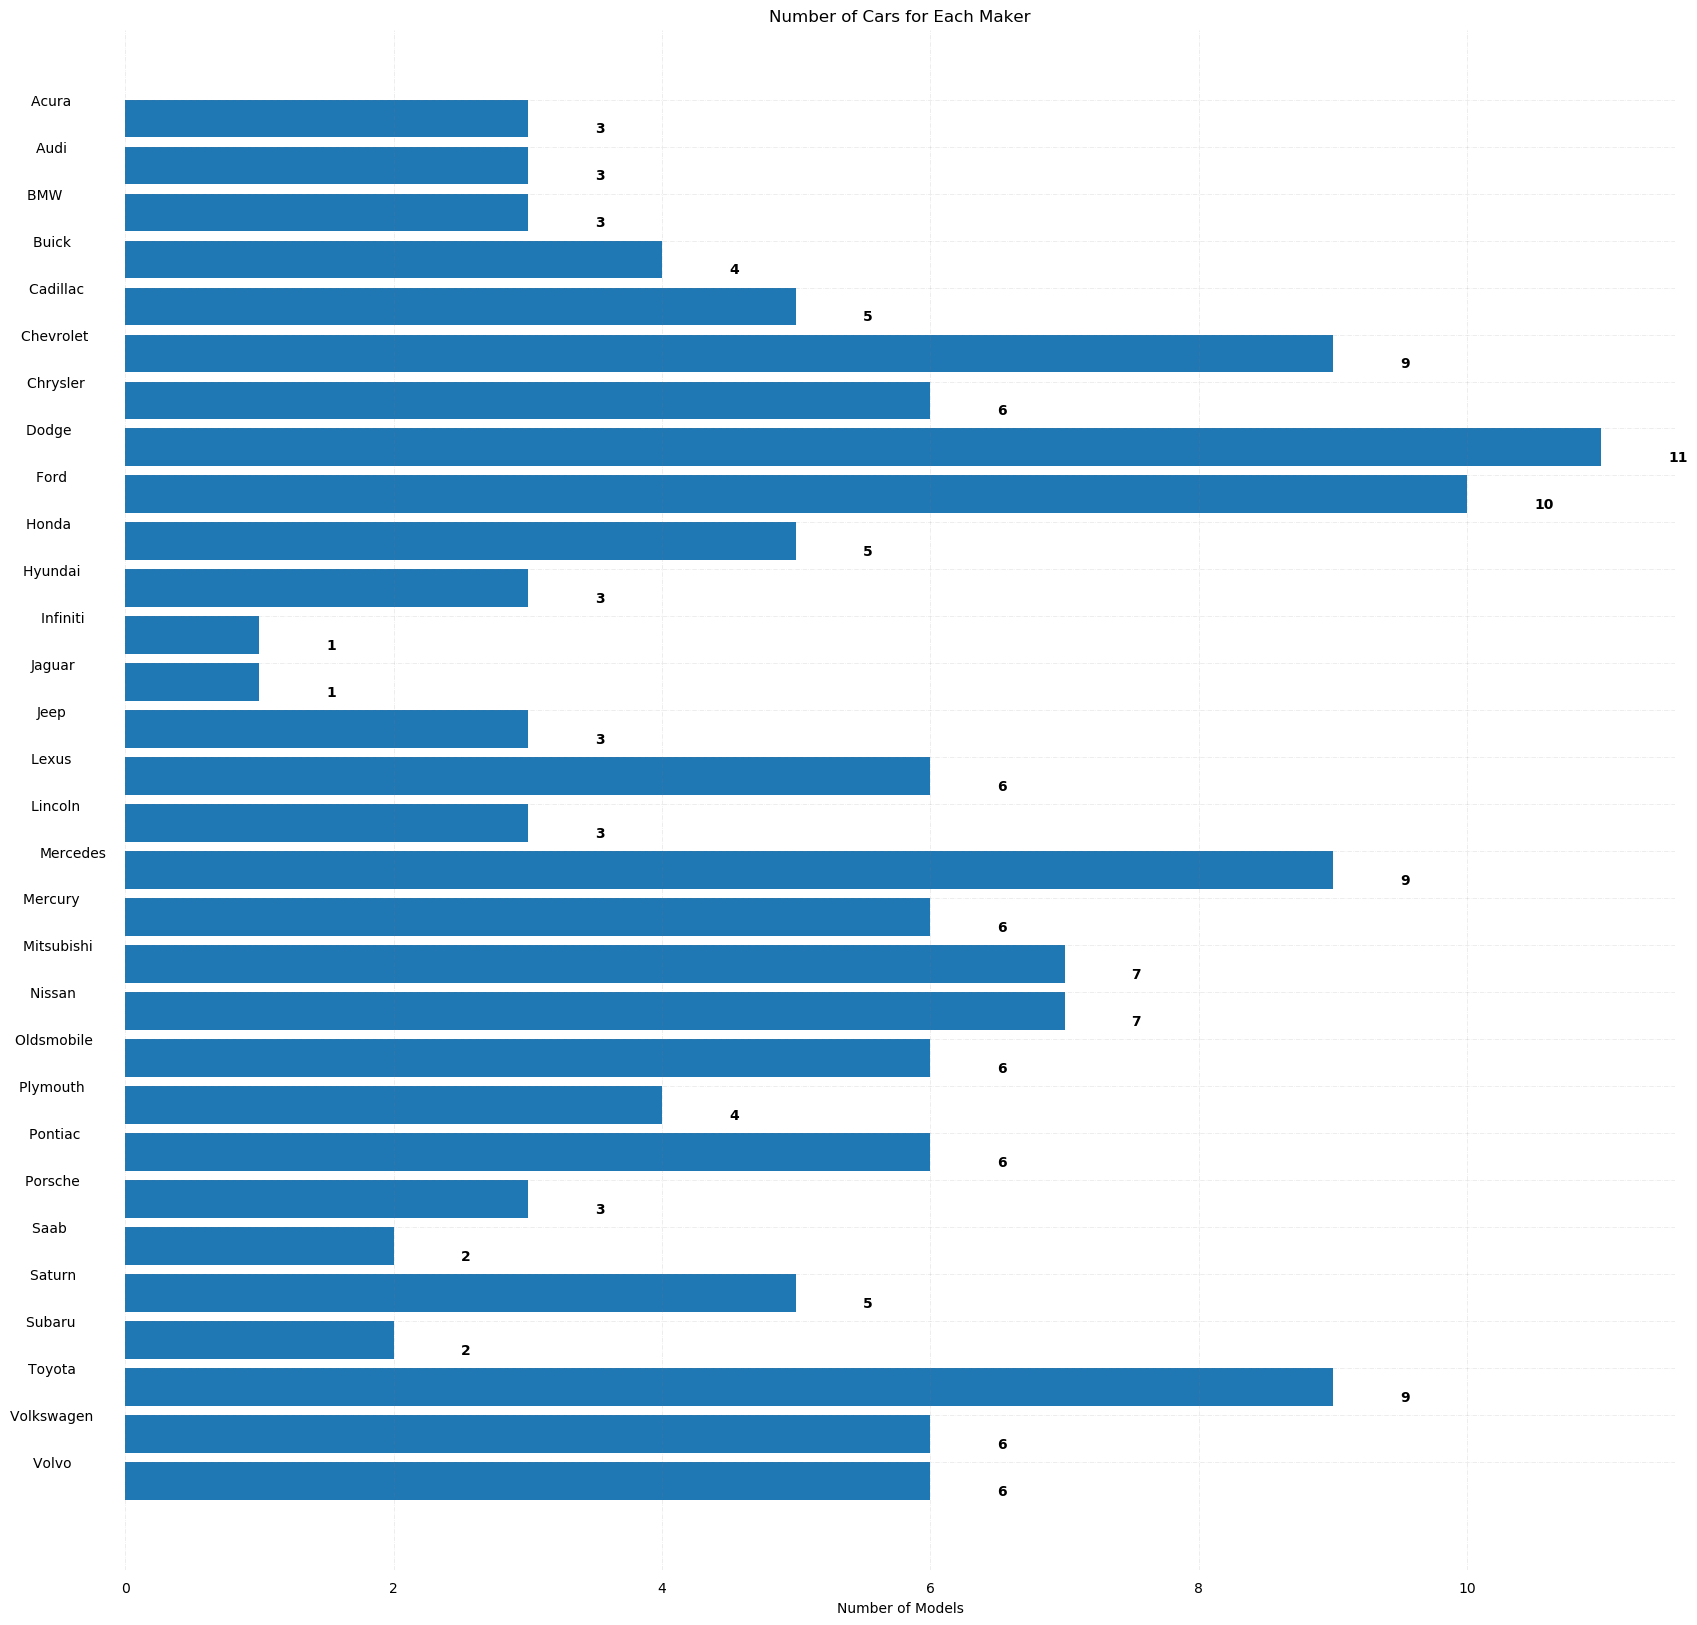

In [12]:
# Horizontal Barplot to show clear distribution of number of models for each manufacturer
dist_df = pd.DataFrame(dist_df)
dist_df.columns= ['count']
dist_df.reset_index(inplace=True)
dist_df.columns= ['make','count']
y_ticks = np.arange(len(list(dist_df['make'])))



plt.rcdefaults()
fig, ax = plt.subplots(figsize=(20,20))
ax.barh(y_ticks, dist_df['count'], align='edge')
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)
ax.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
ax.set_yticks(y_ticks)
ax.set_yticklabels(dist_df['make'])

ax.invert_yaxis()  
for i in ax.patches:
    ax.text(i.get_width()+0.5, i.get_y()+0.7, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='black')
ax.set_xlabel('Number of Models')
ax.set_title('Number of Cars for Each Maker')
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[Text(0, 0.5, 'Manufacturer'),
 Text(0.5, 0, 'Sales in Thousands'),
 Text(0.5, 1.0, 'Sales Distribution Over Manufacturer')]

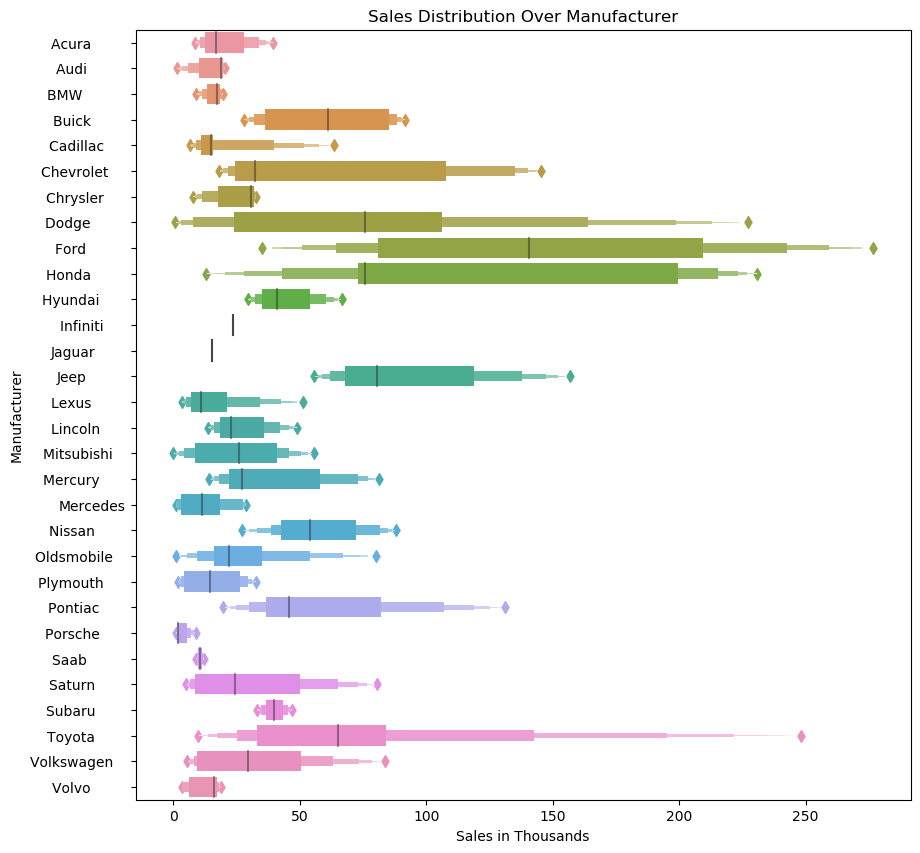

In [13]:
# plotting with box plot
split_df.columns = ['make','type']
split_df['Sales'] = df['Sales']
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.boxenplot(y="make", x='Sales', data=split_df)
ax.set(xlabel= 'Sales in Thousands',ylabel='Manufacturer',title='Sales Distribution Over Manufacturer')

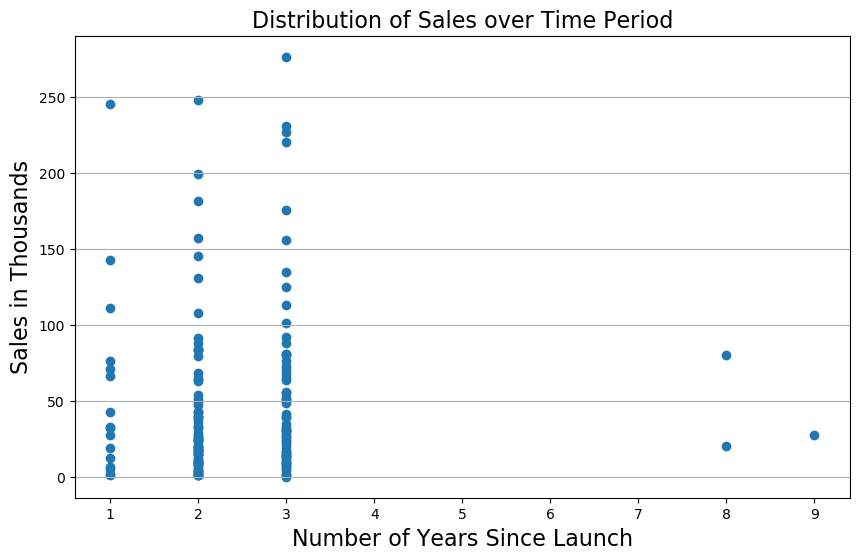

In [21]:
# Plotting the distribution of sales for the time period
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

ax.scatter(df['Years'],df['Sales'])
ax.set_ylabel('Sales in Thousands', fontsize=16)
ax.set_xlabel('Number of Years Since Launch', fontsize=16)
ax.set_title('Distribution of Sales over Time Period', fontsize=16)
plt.grid(axis='y')
plt.show()
# Most of the sales are recorded after 2 & 3 years,
#The sales for years above than 3 are biased

In [22]:
# Removing biased records with sales > 3 years
df = df[df['Years'] <= 3 ]
df.head()

,Model,Sales,Price,Latest-Launch,Days,Months,Years
0,Acura - Integra,16.919,21.50,2014-02-02,1359,45,3
1,Acura - TL,39.384,28.40,2015-03-06,962,32,2
2,Acura - RL,8.588,42.00,2015-10-03,751,25,2
3,Audi - A4,20.397,23.99,2015-08-10,805,26,2
4,Audi - A6,18.780,33.95,2015-09-08,776,25,2


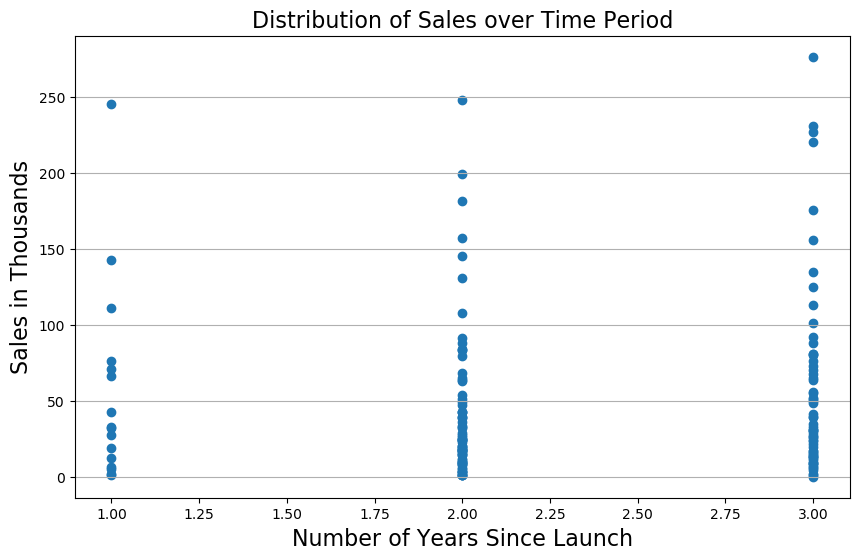

In [23]:
# Plotting the distribution of sales for the time period after dropping biased data
fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)

ax.scatter(df['Years'],df['Sales'])
ax.set_ylabel('Sales in Thousands', fontsize=16)
ax.set_xlabel('Number of Years Since Launch', fontsize=16)
ax.set_title('Distribution of Sales over Time Period', fontsize=16)
plt.grid(axis='y')
plt.show()